# ETF Analaysis 

## Convert Everything in Piyush code to Object Oriented Programming Code

In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
import numpy as np
import os
import time

##### ETF Data Clean up ###########

class ETFDataCleanup(object):
    
    def __init__(self):
        pass

    def showNaColumns(self,df):
        s=df.isnull().sum()
        print(s[s>0])
    
    def dropNAColumns(self,df):
        return df.dropna(axis='columns')
    
    def computeDailyReturns(self,df):
        return df.pct_change().dropna()        
    
    
####### Get Data for Constituents of ETF

class ConstituentsData(ETFDataCleanup):
    
    def __init__(self,fileName=None,startdate=None,enddate=None):
        self.fileName=fileName
        self.startdate=startdate
        self.enddate=enddate
        self.constituentdata=[]
        self.constituentcloseDF=[]
        self.tickerdf=[]
        self.changeDF=[]
        self.waDF=[]
    
    def getconstituentdata(self):
        self.tickerdf = pd.read_excel(self.fileName)
        tickers=self.tickerdf['Ticker']
        self.tickerdf.set_index('Ticker',inplace=True)
        self.constituentdata =  web.DataReader(tickers,'yahoo',self.startdate,self.enddate)
        self.constituentcloseDF = self.constituentdata['Close'].iloc[:, :]
        
    def stringWeightsToFloat(self):
        self.tickerdf['Weights']=self.tickerdf['Weights'].apply(lambda x: x.replace('%','')).astype(float)
    
    def findNetAssetValue(self):
        self.waDF=self.changeDF
        for col in self.changeDF.columns:
            self.waDF[col]=self.changeDF[col]*self.tickerdf['Weights'].loc[col]
        self.waDF['NAV']=self.waDF.sum(axis=1)/100

####### Get prices of ETF        
class ETFStockPrices(ETFDataCleanup):
    
    def __init__(self,etfticker=None,startdate=None,enddate=None):
        self.etfticker=etfticker
        self.startdate=startdate
        self.enddate=enddate
        self.etfdata=[]
        self.etfchangeDF=[]

        
    def getETFTickerData(self):
        self.etfdata =  web.DataReader(self.etfticker,'yahoo',self.startdate,self.enddate)
 


class ETFArbitrage(object):

    def __init__(self,etfob,waDF):
        self.navDF=pd.merge(etfob,waDF['NAV'],left_index=True,right_index=True)
        self.navDF['Date']=self.navDF.index
        del self.navDF['Date']
    
    def scatterplot(self):
        plt.scatter(self.navDF['Close'],self.navDF['NAV'])
        
    def scatterplot2(self):
        #change figure size for the plot
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0]=12
        fig_size[1]=6
        plt.rcParams["figure.figsize"]=fig_size

        self.navDF['Mispricing']=(self.navDF['Close']-self.navDF['NAV'])*100
        plt.scatter(self.navDF.index,self.navDF['Mispricing'])
    
    def seaborndist(self):
        sns.distplot(self.navDF['Mispricing'].values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

## Handle

In [2]:
def mainhandle(filename,startdate,enddate,tickeretf):
    ob=ConstituentsData(fileName=filename,startdate=startdate,enddate=enddate)
    ob.getconstituentdata()
    print(tickeretf)
    print("Tickers with NA Values")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.constituentcloseDF=ob.dropNAColumns(ob.constituentcloseDF)
    print("***************")
    print("Check for NA Values again")
    ob.showNaColumns(ob.constituentcloseDF)
    ob.changeDF=ob.computeDailyReturns(ob.constituentcloseDF)
    ob.stringWeightsToFloat()
    ob.findNetAssetValue()

    print("***************")
    print("Data for Constituents")
    print(ob.waDF.head(5))

    etfob=ETFStockPrices(etfticker=tickeretf,startdate=dt.datetime(2019,1,1),enddate=dt.datetime(2020,1,22))
    etfob.getETFTickerData()
    print("Show Any Empty Values")
    etfob.showNaColumns(etfob.etfdata)
    etfob.etfchangeDF=etfob.computeDailyReturns(etfob.etfdata['Close'])

    print("***************")
    print("Data for ETF stock prices")
    print(etfob.etfchangeDF.head(5))

    print("****************")
    print("Charts")
    arbob=ETFArbitrage(etfob.etfchangeDF,ob.waDF)
    arbob.scatterplot()
    plt.show()
    arbob.scatterplot2()
    plt.show()
    arbob.seaborndist()
    plt.show()

# Analayze all ETFs together

XLK
Tickers with NA Values
Symbols
NLOK    64
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols         AAPL       ACN      ADBE       ADI       ADP       ADS  \
Date                                                                     
2019-01-03 -1.997128 -0.069649 -0.103089 -0.038659 -0.035634 -0.001771   
2019-01-04  0.855921  0.079323  0.126931  0.015538  0.047028  0.004738   
2019-01-07 -0.044628  0.007086  0.035425  0.004025 -0.006384 -0.000004   
2019-01-08  0.382216  0.051591  0.038935  0.015613  0.006961  0.001217   
2019-01-09  0.340484  0.010260  0.030847  0.016218  0.001078  0.001532   

Symbols         ADSK      AKAM      AMAT       AMD  ...       TEL       TXN  \
Date                                                ...                       
2019-01-03 -0.036939 -0.005328 -0.049253 -0.080351  ... -0.018674 -0.107921   
2019-01-04  0.035356  0.006988  0.058212  0.097214  ...  0.013116  0.082770   
2

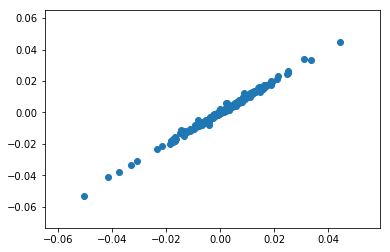

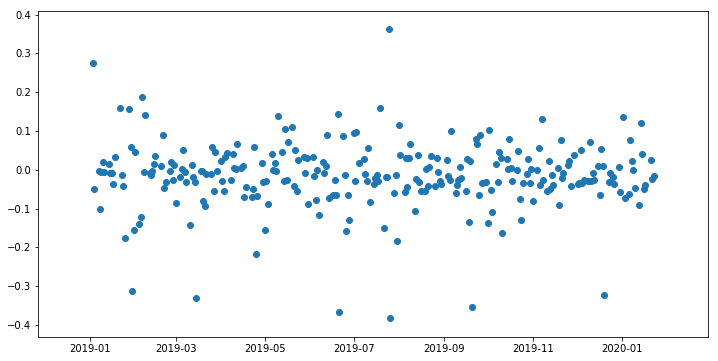

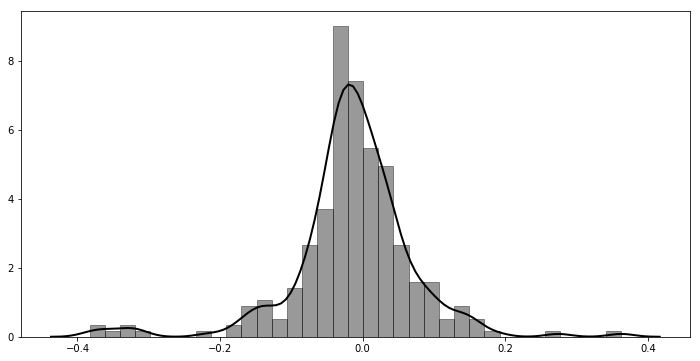

XLI
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AAL       ALK      ALLE       AME       AOS      ARNC  \
Date                                                                     
2019-01-03 -0.031293 -0.018238 -0.008283 -0.026173 -0.006039 -0.003432   
2019-01-04  0.027665  0.010674 -0.001107  0.034796  0.010019  0.014091   
2019-01-07  0.011929  0.000660  0.005116 -0.001487  0.004476  0.011630   
2019-01-08 -0.006756  0.002909  0.006771  0.013541  0.006123  0.001515   
2019-01-09  0.012955  0.008325  0.005475  0.006139  0.003478  0.001258   

Symbols           BA       CAT      CHRW       CMI  ...       UAL       UNP  \
Date                                                ...                       
2019-01-03 -0.277090 -0.118686 -0.016226 -0.020585  ... -0.034262 -0.188409   
2019-01-04  0.361695  0.168309  0.015250  0.043194  ...  0.023115  0.196035   
2019-01-

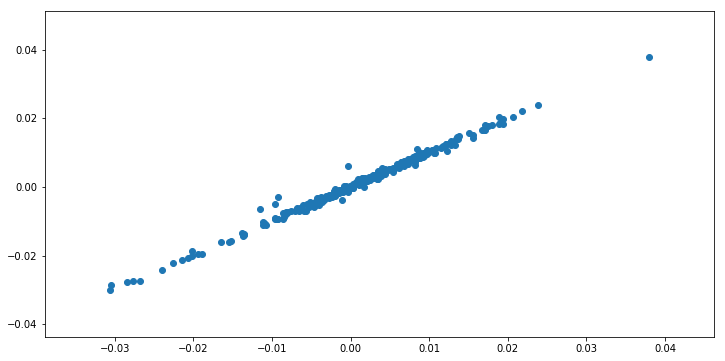

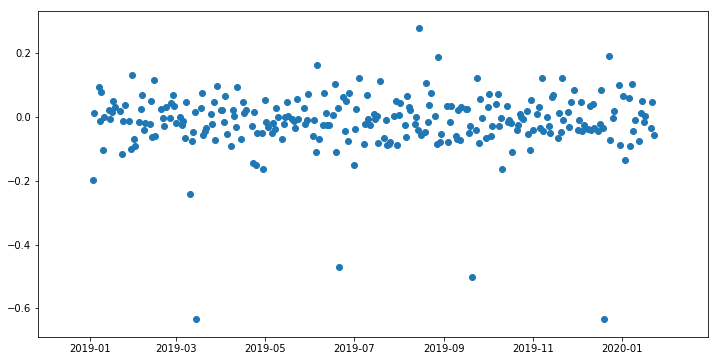

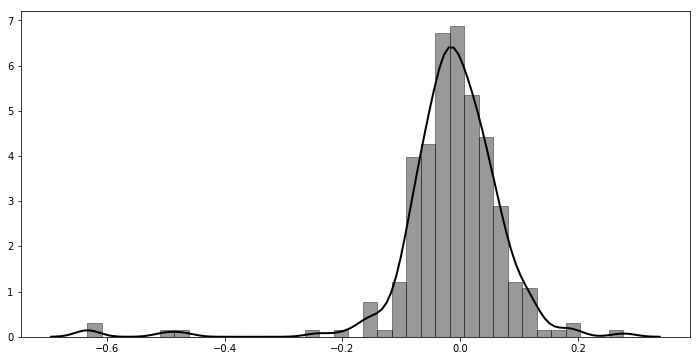

XLY
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AAP      AMZN      APTV       AZO       BBY      BKNG  \
Date                                                                     
2019-01-03  0.012487 -0.596457 -0.011341  0.009399 -0.017239 -0.113982   
2019-01-04 -0.009923  1.183012  0.034591 -0.013061  0.004000  0.109638   
2019-01-07  0.005869  0.811771  0.014412 -0.017680  0.047932 -0.011176   
2019-01-08 -0.002780  0.392549  0.051408 -0.014781  0.024706 -0.048729   
2019-01-09  0.011024  0.040512  0.035868  0.012299  0.006293 -0.074331   

Symbols          BWA       CCL       CMG      CPRI  ...       TPR      TSCO  \
Date                                                ...                       
2019-01-03 -0.009957 -0.037809 -0.008202 -0.009969  ... -0.012119 -0.008859   
2019-01-04  0.012398  0.042998  0.032908  0.010409  ...  0.011357  0.009670   
2019-01-

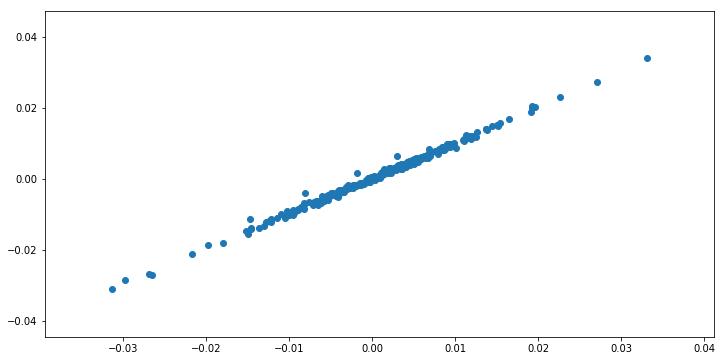

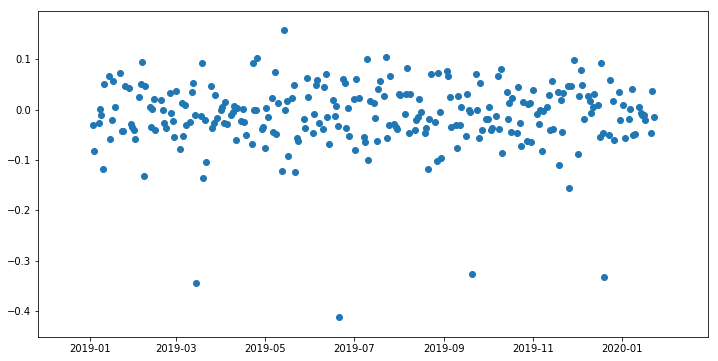

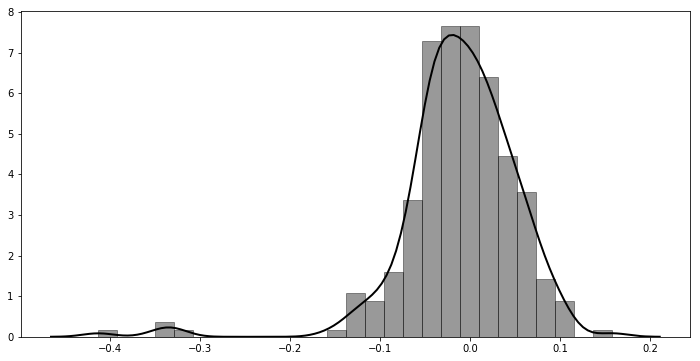

XLRE
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AIV       AMT       ARE       AVB       BXP      CBRE  \
Date                                                                     
2019-01-03  0.008649  0.078202  0.020569  0.017920  0.010578 -0.128234   
2019-01-04  0.003476  0.052101  0.025501  0.026753  0.043509  0.103341   
2019-01-07  0.000693  0.080722  0.015365 -0.010626  0.015756  0.035630   
2019-01-08  0.027231  0.147354  0.057811  0.078588  0.074264  0.082182   
2019-01-09  0.001797 -0.114138  0.010873  0.032624  0.041497  0.017616   

Symbols          CCI       DLR       DRE      EQIX  ...       REG      SBAC  \
Date                                                ...                       
2019-01-03  0.038769 -0.016831  0.001965 -0.072848  ...  0.001859  0.039307   
2019-01-04  0.115726  0.069617  0.022896  0.142505  ...  0.004873  0.008687   
2019-01

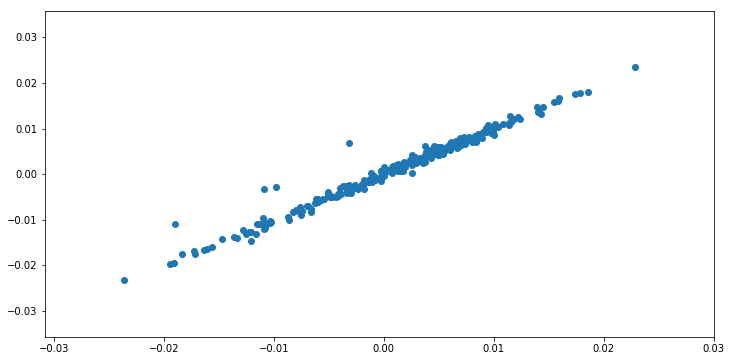

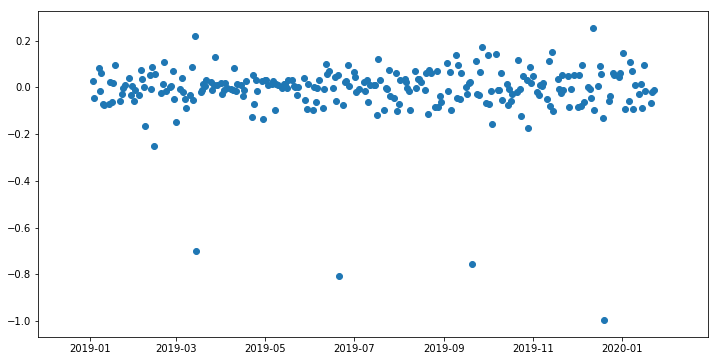

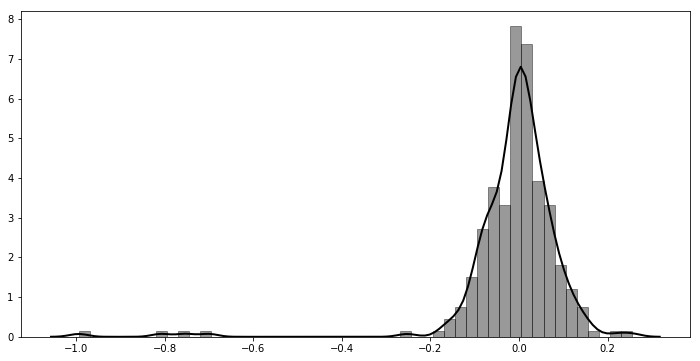

XLU
Tickers with NA Values
Symbols
NI    3
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AEE       AEP       AES       ATO       AWK       CMS  \
Date                                                                     
2019-01-03  0.005339 -0.012493 -0.001008  0.011277  0.010370  0.003819   
2019-01-04  0.029958  0.049350  0.047431  0.019092  0.019772  0.019060   
2019-01-07 -0.024289 -0.029924  0.006837 -0.010888 -0.027826 -0.010491   
2019-01-08  0.033535  0.066055  0.033052  0.019480  0.038485  0.030792   
2019-01-09 -0.015689 -0.040600 -0.002850 -0.024400 -0.033553 -0.019532   

Symbols          CNP         D       DTE       DUK  ...       NEE       NRG  \
Date                                                ...                       
2019-01-03  0.008057 -0.034965  0.011387 -0.002646  ... -0.034400 -0.009446   
2019-01-04  0.026037  0.141564  0.041577  0.061758  ...  0.256178  0.034172   
2019

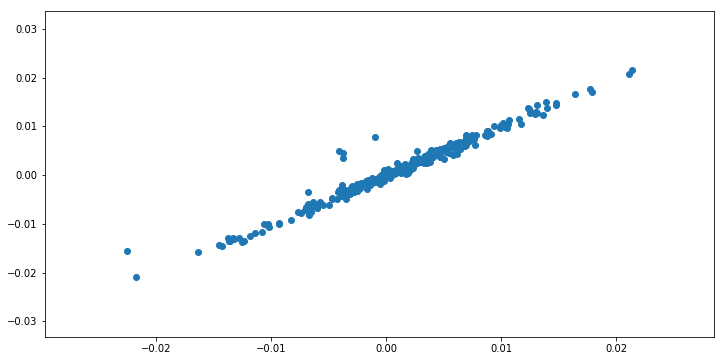

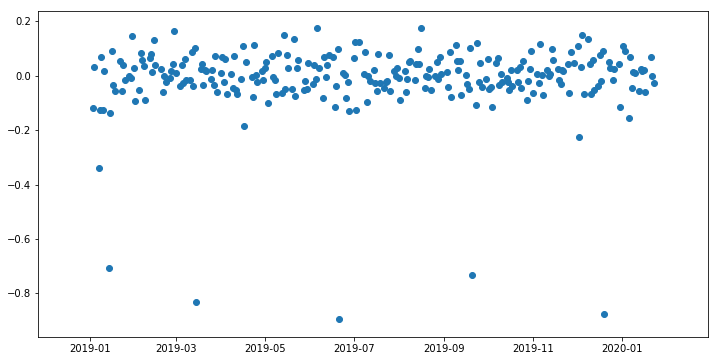

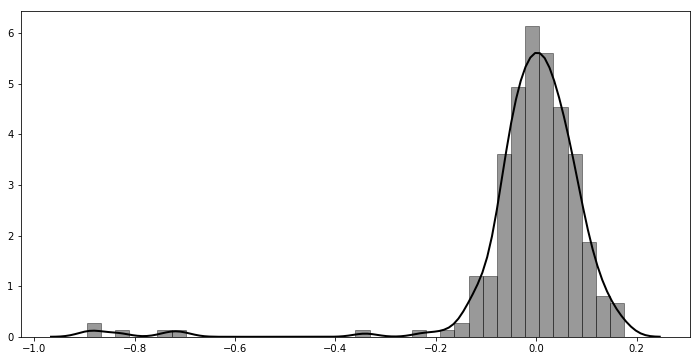

XLB
Tickers with NA Values
Symbols
CTVA    99
DOW     53
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          ALB      AMCR       APD       AVY       BLL        CE  \
Date                                                                     
2019-01-03 -0.086737  0.000000 -0.204090 -0.051592 -0.033134 -0.073383   
2019-01-04  0.061047  0.000000  0.308692  0.061723  0.108480  0.081882   
2019-01-07  0.005575  0.055914 -0.079109  0.007559  0.067306  0.018900   
2019-01-08  0.012242 -0.016421 -0.087553  0.016271  0.036535  0.028086   
2019-01-09 -0.007921  0.002754 -0.062578 -0.001385  0.013852  0.009233   

Symbols           CF        DD       ECL       EMN  ...       MOS       NEM  \
Date                                                ...                       
2019-01-03 -0.044463 -0.231895 -0.170260 -0.032833  ... -0.024267 -0.014472   
2019-01-04  0.106956  0.265927  0.264583  0.068216  ...  0.066144  0.

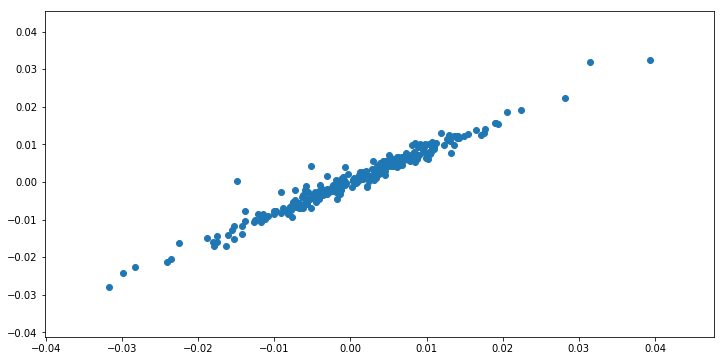

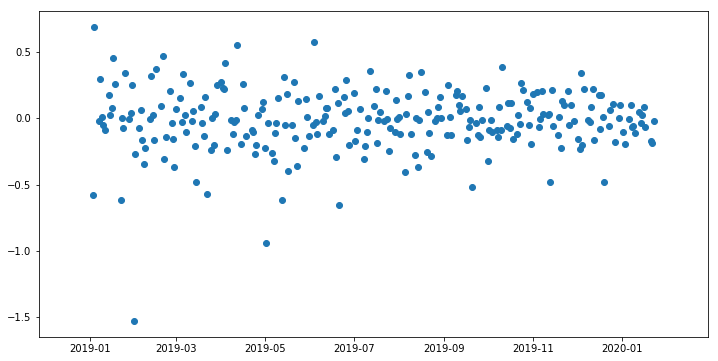

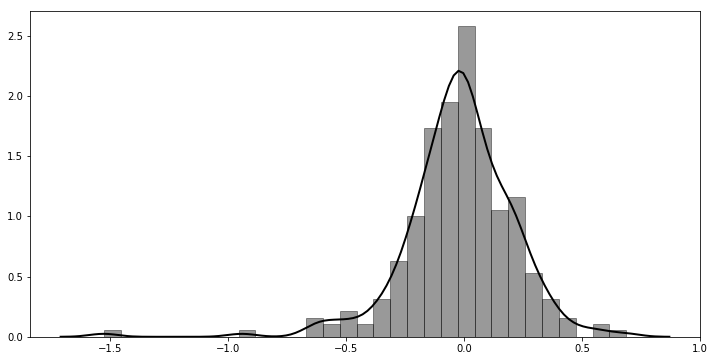

XLC
Tickers with NA Values
Symbols
CTL      3
FOX     48
FOXA    47
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols         ATVI      CHTR     CMCSA       DIS     DISCA     DISCK  \
Date                                                                     
2019-01-03 -0.151979 -0.007758  0.034094 -0.096665 -0.003368  0.002921   
2019-01-04  0.170785  0.241719  0.146588  0.123081  0.010389  0.022336   
2019-01-07  0.120679 -0.019129 -0.046054  0.034582  0.008653  0.016674   
2019-01-08  0.129724 -0.011496  0.035524  0.031037  0.015522  0.023482   
2019-01-09  0.073660 -0.046553  0.041310  0.044763  0.000852  0.005524   

Symbols         DISH        EA        FB      GOOG  ...       NWS      NWSA  \
Date                                                ...                       
2019-01-03  0.023787 -0.080759 -0.575259 -0.332978  ... -0.002713 -0.006181   
2019-01-04  0.080257  0.283650  0.933808  0.628760  ...  0

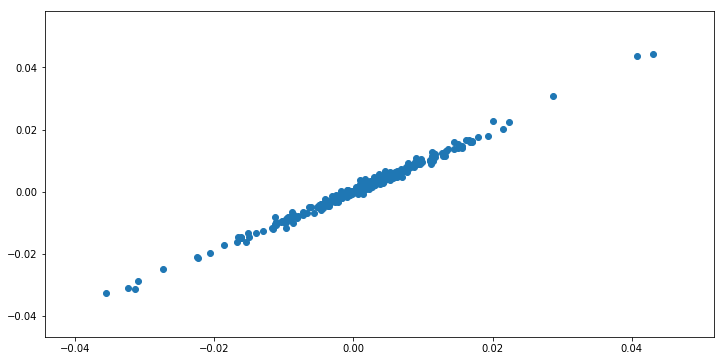

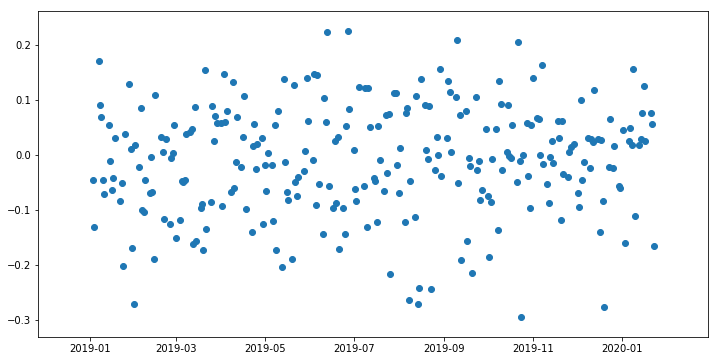

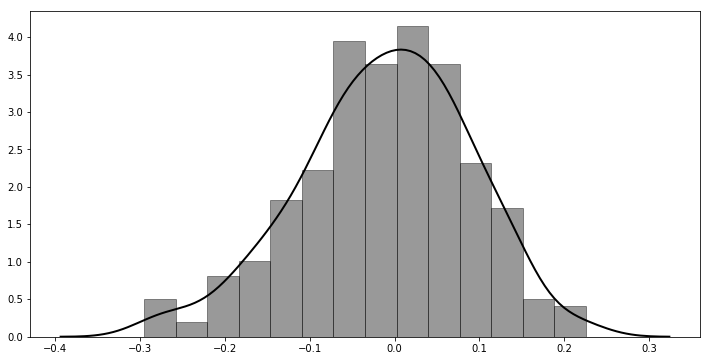

XLV
Tickers with NA Values
Symbols
COO    3
JNJ    3
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols            A      ABBV       ABC      ABMD       ABT       AGN  \
Date                                                                     
2019-01-03 -0.026156 -0.108071 -0.005077 -0.005444 -0.197272  0.002293   
2019-01-04  0.024576  0.105672  0.004055  0.008115  0.119302  0.078342   
2019-01-07  0.015076  0.047873  0.002499  0.000955  0.062599 -0.001495   
2019-01-08  0.010408  0.015244  0.003746  0.002530 -0.050186  0.036383   
2019-01-09  0.014864 -0.107660  0.003567  0.012423  0.069769 -0.011264   

Symbols         ALGN      ALXN      AMGN      ANTM  ...       UHS       UNH  \
Date                                                ...                       
2019-01-03 -0.042037  0.013658 -0.053257 -0.049173  ... -0.003854 -0.193890   
2019-01-04  0.005118  0.035823  0.119642  0.011396  ...  0.006896  0.0831

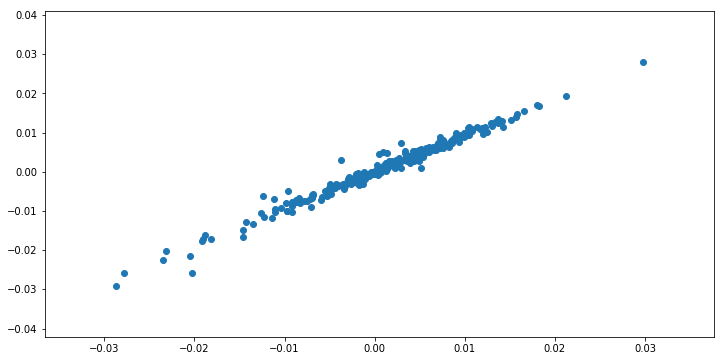

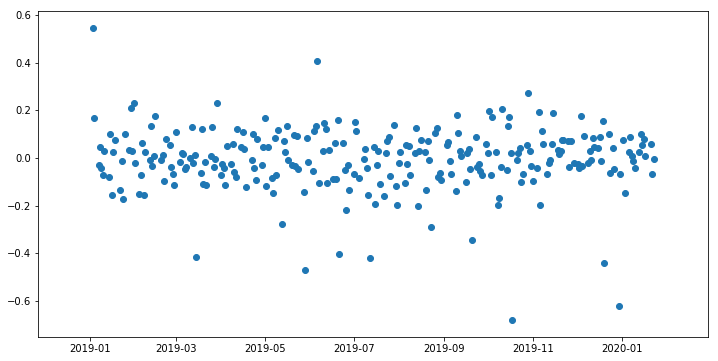

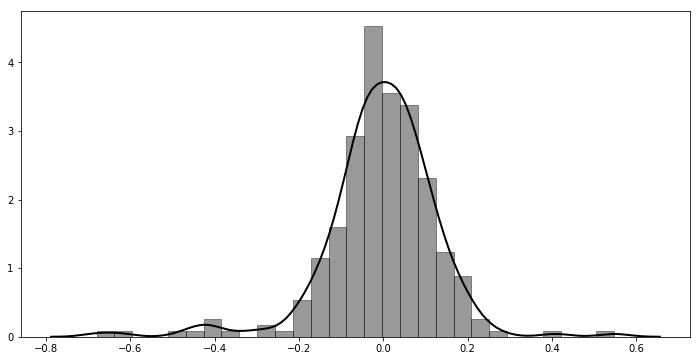

XLE
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          APA       BKR       COG       COP       CVX       CXO  \
Date                                                                     
2019-01-03  0.002918 -0.009910 -0.003889 -0.087472 -0.390522  0.002613   
2019-01-04  0.047395  0.074821 -0.006523  0.116652  0.422561  0.080419   
2019-01-07  0.024340  0.040032  0.024790 -0.020292  0.264949  0.042719   
2019-01-08  0.016796  0.043610  0.008870  0.061872 -0.089001  0.063165   
2019-01-09  0.057732 -0.002568 -0.014238  0.152994  0.273642  0.047916   

Symbols          DVN       EOG      FANG       FTI  ...       OKE       OXY  \
Date                                                ...                       
2019-01-03  0.012154 -0.032703  0.013130  0.001516  ... -0.007574 -0.046826   
2019-01-04  0.040625  0.203273  0.052143  0.039713  ...  0.138410  0.122884   
2019-01-

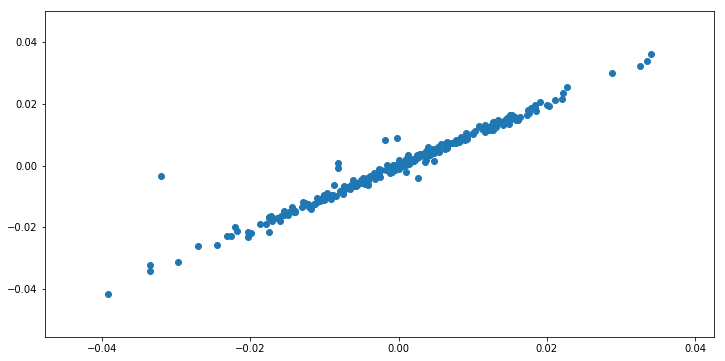

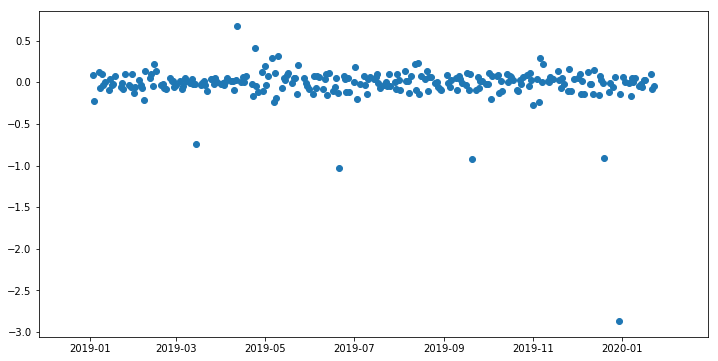

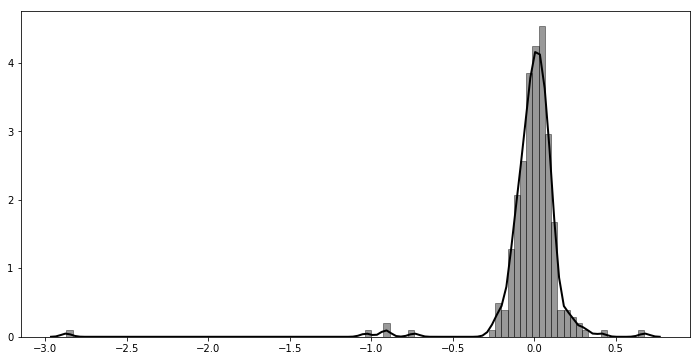

XLP
Tickers with NA Values
Series([], dtype: int64)
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          ADM      BF-b       CAG       CHD        CL       CLX  \
Date                                                                     
2019-01-03 -0.006286 -0.011878  0.010028 -0.002282 -0.016729  0.007027   
2019-01-04  0.032970  0.028657  0.012941  0.012576  0.033017  0.007994   
2019-01-07  0.007200 -0.003391  0.019145  0.013234  0.021411  0.014031   
2019-01-08  0.026608  0.002271 -0.036266 -0.002550  0.039609 -0.028494   
2019-01-09  0.012391 -0.008734 -0.002603  0.001598  0.043848 -0.001561   

Symbols         COST      COTY       CPB        EL  ...        PG        PM  \
Date                                                ...                       
2019-01-03 -0.099619 -0.004144  0.006076 -0.122885  ... -0.113304 -0.057259   
2019-01-04  0.136484  0.009809  0.002701  0.087377  ...  0.329832  0.207365   
2019-01-

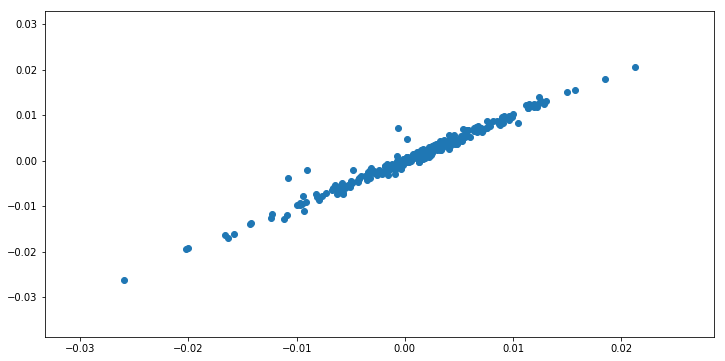

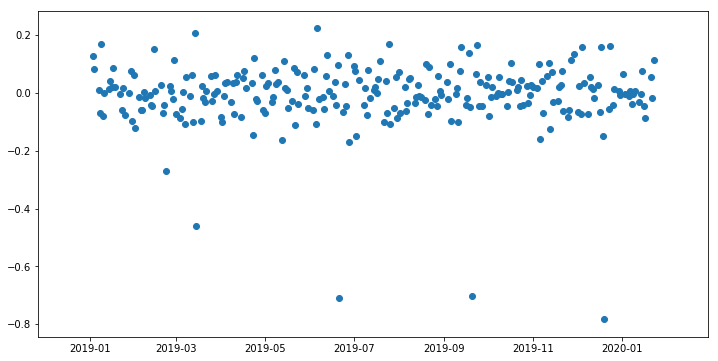

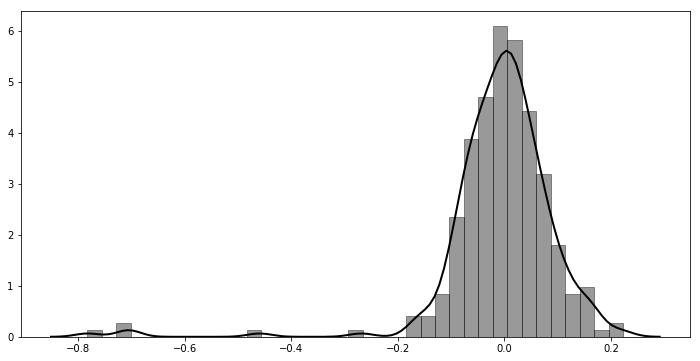

/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'CBOE-Z', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


XLF
Tickers with NA Values
Symbols
CBOE-Z    267
LNC         3
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols          AFL       AIG       AIZ       AJG       ALL       AMP  \
Date                                                                     
2019-01-03 -0.028548 -0.028546 -0.003676 -0.009953 -0.018383 -0.016160   
2019-01-04  0.014007  0.047974  0.004644  0.013374  0.033056  0.032677   
2019-01-07  0.006037  0.007441  0.000915 -0.001539 -0.001761  0.002810   
2019-01-08  0.003503  0.005147  0.000279  0.002352 -0.000136  0.003839   
2019-01-09 -0.002494  0.018906  0.001417  0.006220  0.008550  0.006321   

Symbols          AON       AXP       BAC       BEN  ...       TFC      TROW  \
Date                                                ...                       
2019-01-03 -0.022194 -0.061376 -0.126763 -0.003685  ... -0.014733 -0.029363   
2019-01-04  0.027852  0.117608  0.328510  0.006553  ...  0.0573

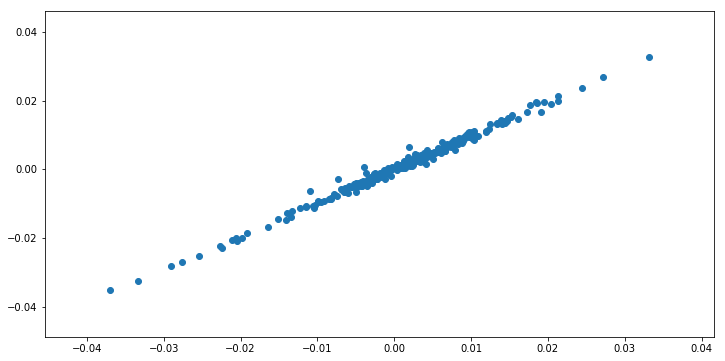

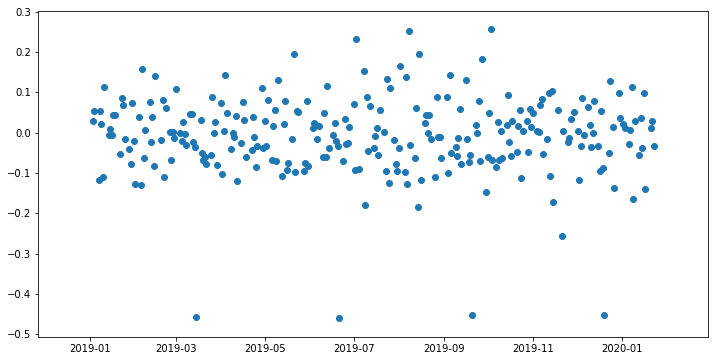

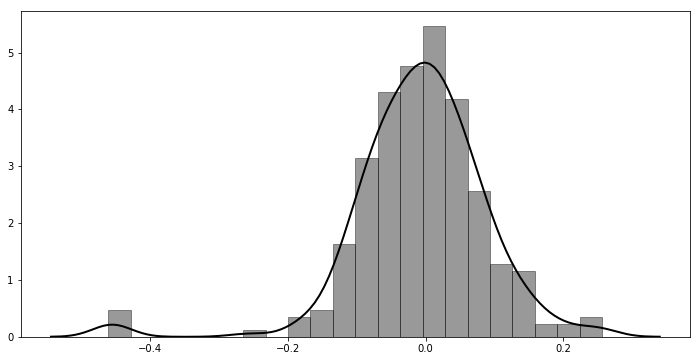

In [7]:
savingpath = 'ETFDailyData'+'/'+dt.datetime.now().strftime("%Y%m%d") 
for filename in os.listdir(savingpath):
    if filename != '.DS_Store':
        tickeretf=filename.split('.')[0]
        mainhandle(savingpath+'/'+filename,dt.datetime(2019,1,1),dt.datetime(2020,1,22),tickeretf)
        time.sleep(4)